# **Gaussian Blur** by *Rémi Fourcroy, Computer Vision Graduate Engineer*
#### Contact : remifourcroy.pro@gmail.com

This notebook consists in understanding the logic behind the Gaussian Blur. This method can be found in famous librairies like openCV, and we will write our own gaussian blur function here, and try it out on the following image. 

### **Step 1 : Using CV2 Gaussian Blurring**

In this preliminary step, I just wanted to showcase the objective of the functions that we will write further down, this blurring used was from openCV, the function is *cv2.GaussianBlur*.

In [83]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from PIL import Image

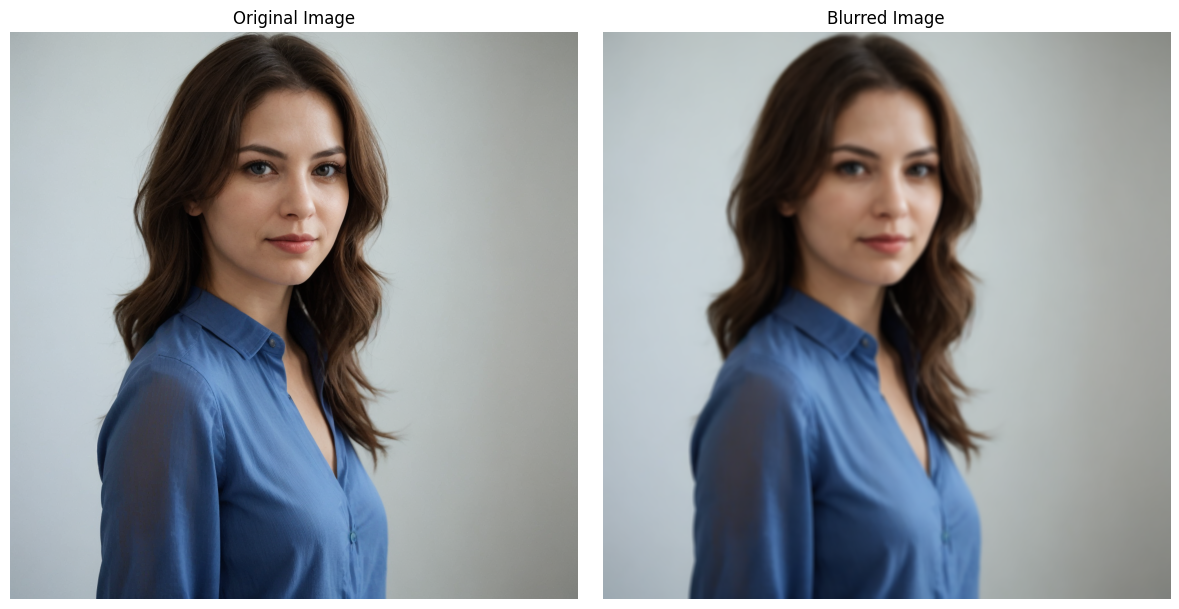

In [84]:
im=cv2.imread('woman.png')
im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
imgBlurGaussian=cv2.GaussianBlur(im,(9,9),5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

#original image displaying
axes[0].imshow(im)
axes[0].set_title("Original Image")
axes[0].axis('off')  
#blurred image using gaussian blur from openCV - dsiplaying
axes[1].imshow(imgBlurGaussian)
axes[1].set_title("Blurred Image")
axes[1].axis('off')  

# Show the images
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### **Step 2 : Creating the Gaussian kernel**

What's the kernel ? The kernel is a square matrix that is used to calculate the weighted average of the neighboring pixels. These weights are determined by the Gaussian formula. This kernel is used to smooth out an image. The numbers inside the kernel (weights) are chosen following the gaussian formula as mentioned above. The center and middle 'lines' are more important than edges. When you look at the curve of the gaussian formula, it can be understood pretty easily. 

Consequently, a kernel matrix will have the highest number in the center, and the lowest number in the corners. 

**[CODE EXPLANATION]** : For the **gaussian_kernel** function, we start by created a range of values centered around 0 that corresponds to the x axis of the gaussian curve. We get the remaining values on the y axis with the definition of *kernel_1d*, the result in shown inside of the figure *1D Gaussian Distribution*. 

We now have our 1-dim kernel vector, that is a row of weights that follows the gaussian formula. To convert this into a 2-dim kernel matrix that we need, we compute the outer product of the 1D kernel with itself, resulting in the 2D kernel matrix that we need. 

Finally, we normalize the kernel in order to block any changes in the brightness of the final blurred/smoothed image. 

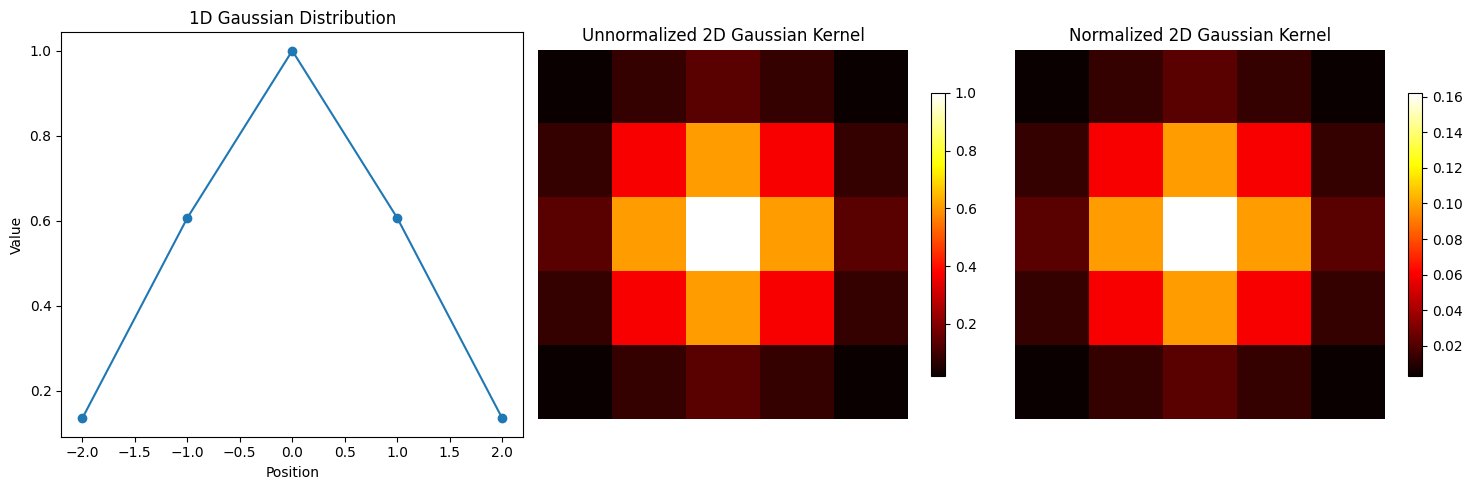

In [85]:
#defining the kernel creation function
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    kernel_1d = np.exp(-0.5 * (ax / sigma)**2)
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    kernel_normalized = kernel_2d / np.sum(kernel_2d)
    return ax, kernel_2d, kernel_normalized

kernel_size = 5
sigma = 1.0

# Generate Gaussian Kernel
ax, kernel_2d, kernel_normalized = gaussian_kernel(kernel_size, sigma)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#1D plotting of the gaussian distribution
axes[0].plot(ax, np.exp(-0.5 * (ax / sigma)**2), marker='o')
axes[0].set_title("1D Gaussian Distribution")
axes[0].set_xlabel("Position")
axes[0].set_ylabel("Value")

#2D gaussian kernel (not normalized)
im1 = axes[1].imshow(kernel_2d, cmap='hot', interpolation='nearest')
axes[1].set_title("Unnormalized 2D Gaussian Kernel")
fig.colorbar(im1, ax=axes[1], shrink=0.7)
axes[1].axis('off')

#2D gaussian kernel (normalized)
im2 = axes[2].imshow(kernel_normalized, cmap='hot', interpolation='nearest')
axes[2].set_title("Normalized 2D Gaussian Kernel")
fig.colorbar(im2, ax=axes[2], shrink=0.7)
axes[2].axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### **STEP 3 : Applying the gaussian on our image by convolution**

Here, we first detect if the image is a grayscale image(2 channels) or a color image(3 channels). If the image is *grayscale*, we apply directly the convolution on the image (matrix) using the kernel generated earlier. If the image is *colored* (3D array), the convolution will be applied seperately on each channel (RGB). This ensures that the blur is applied in a consistent manner. We loop through each channel (*c=0(red), 1(green), 2(blue)*), apply the convolution independently to each channel and put pack the result in a 3D array. 






In [89]:
def apply_gaussian_blur(image, kernel):
    if image.ndim == 3:  # Color image (3D array)
        return np.stack([convolve2d(image[:, :, c], kernel, mode='same', boundary='symm') for c in range(image.shape[2])], axis=2)
    else:  # Grayscale image (2D array)
        return convolve2d(image, kernel, mode='same', boundary='symm')


### **STEP 4 : Initializing variables and testing functions**

In this step, we initialize a kernel of 9x9, which corresponds to a stronger blur than smaller kernels. The variable sigma has an effect on the 'width' of the Gaussian distribution. The wider the distribution (higher sigma), the more intense the blur will be, resulting in a smoother output image. If the gaussian distribution is more narrow (smaller sigma), the output image will preserve more details and the effect of the blur will be minimal. 

In [87]:
image = np.array(Image.open('woman.png').convert('RGB')) / 255.0
kernel_size = 9
sigma = 5

ax,kernelNN,kernel = gaussian_kernel(kernel_size, sigma)
blurred_image = apply_gaussian_blur(image, kernel)


### **STEP 5 : Displaying images**

Here we display the input image and output image, with the 9x9 kernel and sigma=5. Playing around with the variables helps to understand how the effect works. 

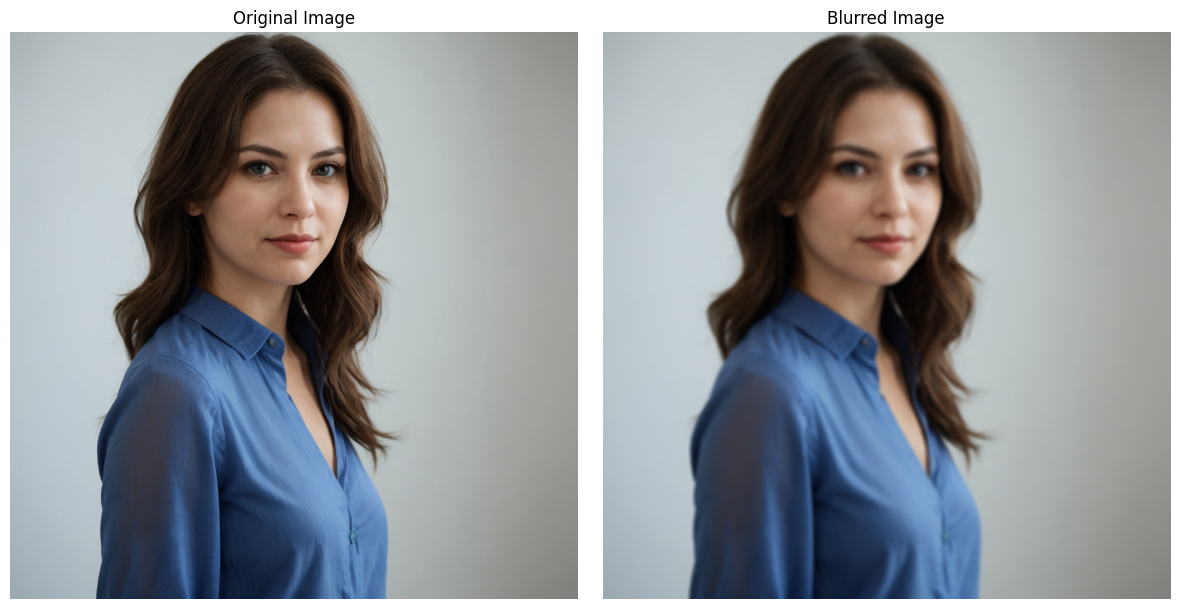

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

#original image displaying
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')  
#blurred image using gaussian blur from openCV - dsiplaying
axes[1].imshow(blurred_image)
axes[1].set_title("Blurred Image")
axes[1].axis('off')  

# Show the images
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


# **CONCLUSION**

The gaussian blur was successfully implemented. Of course, using the gaussian blur from openCV is the same, but it is extremely interesting trying to implement it myslef. The result transformed image is satisfying, as it is loyal the blurring effect exmaple from the beginning, using openCV.

If you have any remarks, questions, or else, please feel free to contact me : **remifourcroy.pro@gmail.com**, I will be more than happy to exchange with you !

A little more about me : I am a fresh graduate from France, specializing in computer vision. The important aspect for me is to understand the mathematical backend of the main functions used in most libraries. I am currently working on new functions to implement and understand and will further explore new exciting projects !